<a href="https://colab.research.google.com/github/ThushanDodanwela/Sales-Prediction/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car Price Prediction Model - Linear Regression 

In [ ]:
#package/Libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error, mean_squared_error
from math import sqrt



Import Data set

In [ ]:
url= 'https://drive.google.com/file/d/1tpYw6I9tW0oXeIahj5pqlkHuR3chC65V/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id 
raw_data = pd.read_csv(dwn_url)
print(raw_data.head())
print(raw_data.shape[0])

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

***Data Preprocessing***

In [ ]:
#invetigate all the element eithin each feature

for col in raw_data:
  unique_val = np.unique(raw_data[col])
  no_val = len(unique_val)
  if(no_val<10):
    print("The number of feature {} :{} -- {}" . format(col, no_val,unique_val))
  else:
    print("The Number of values for feature {} :{}".format(col, no_val))

The Number of values for feature car_ID :205
The number of feature symboling :6 -- [-2 -1  0  1  2  3]
The Number of values for feature CarName :147
The number of feature fueltype :2 -- ['diesel' 'gas']
The number of feature aspiration :2 -- ['std' 'turbo']
The number of feature doornumber :2 -- ['four' 'two']
The number of feature carbody :5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of feature drivewheel :3 -- ['4wd' 'fwd' 'rwd']
The number of feature enginelocation :2 -- ['front' 'rear']
The Number of values for feature wheelbase :53
The Number of values for feature carlength :75
The Number of values for feature carwidth :44
The Number of values for feature carheight :49
The Number of values for feature curbweight :171
The number of feature enginetype :7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of feature cylindernumber :7 -- ['eight' 'five' 'four' 'six' 'three' 'twelve' 'two']
The Number of values for feature enginesize :44
The number 

In [ ]:
#Check Null Values
raw_data.isnull().sum()

#if there are any nan
# raw_data["col_name"][raw_data['col_name].isna()]= raw_data['col_name].mean()S

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

###**Investigate numeric Values with Scatterplots**

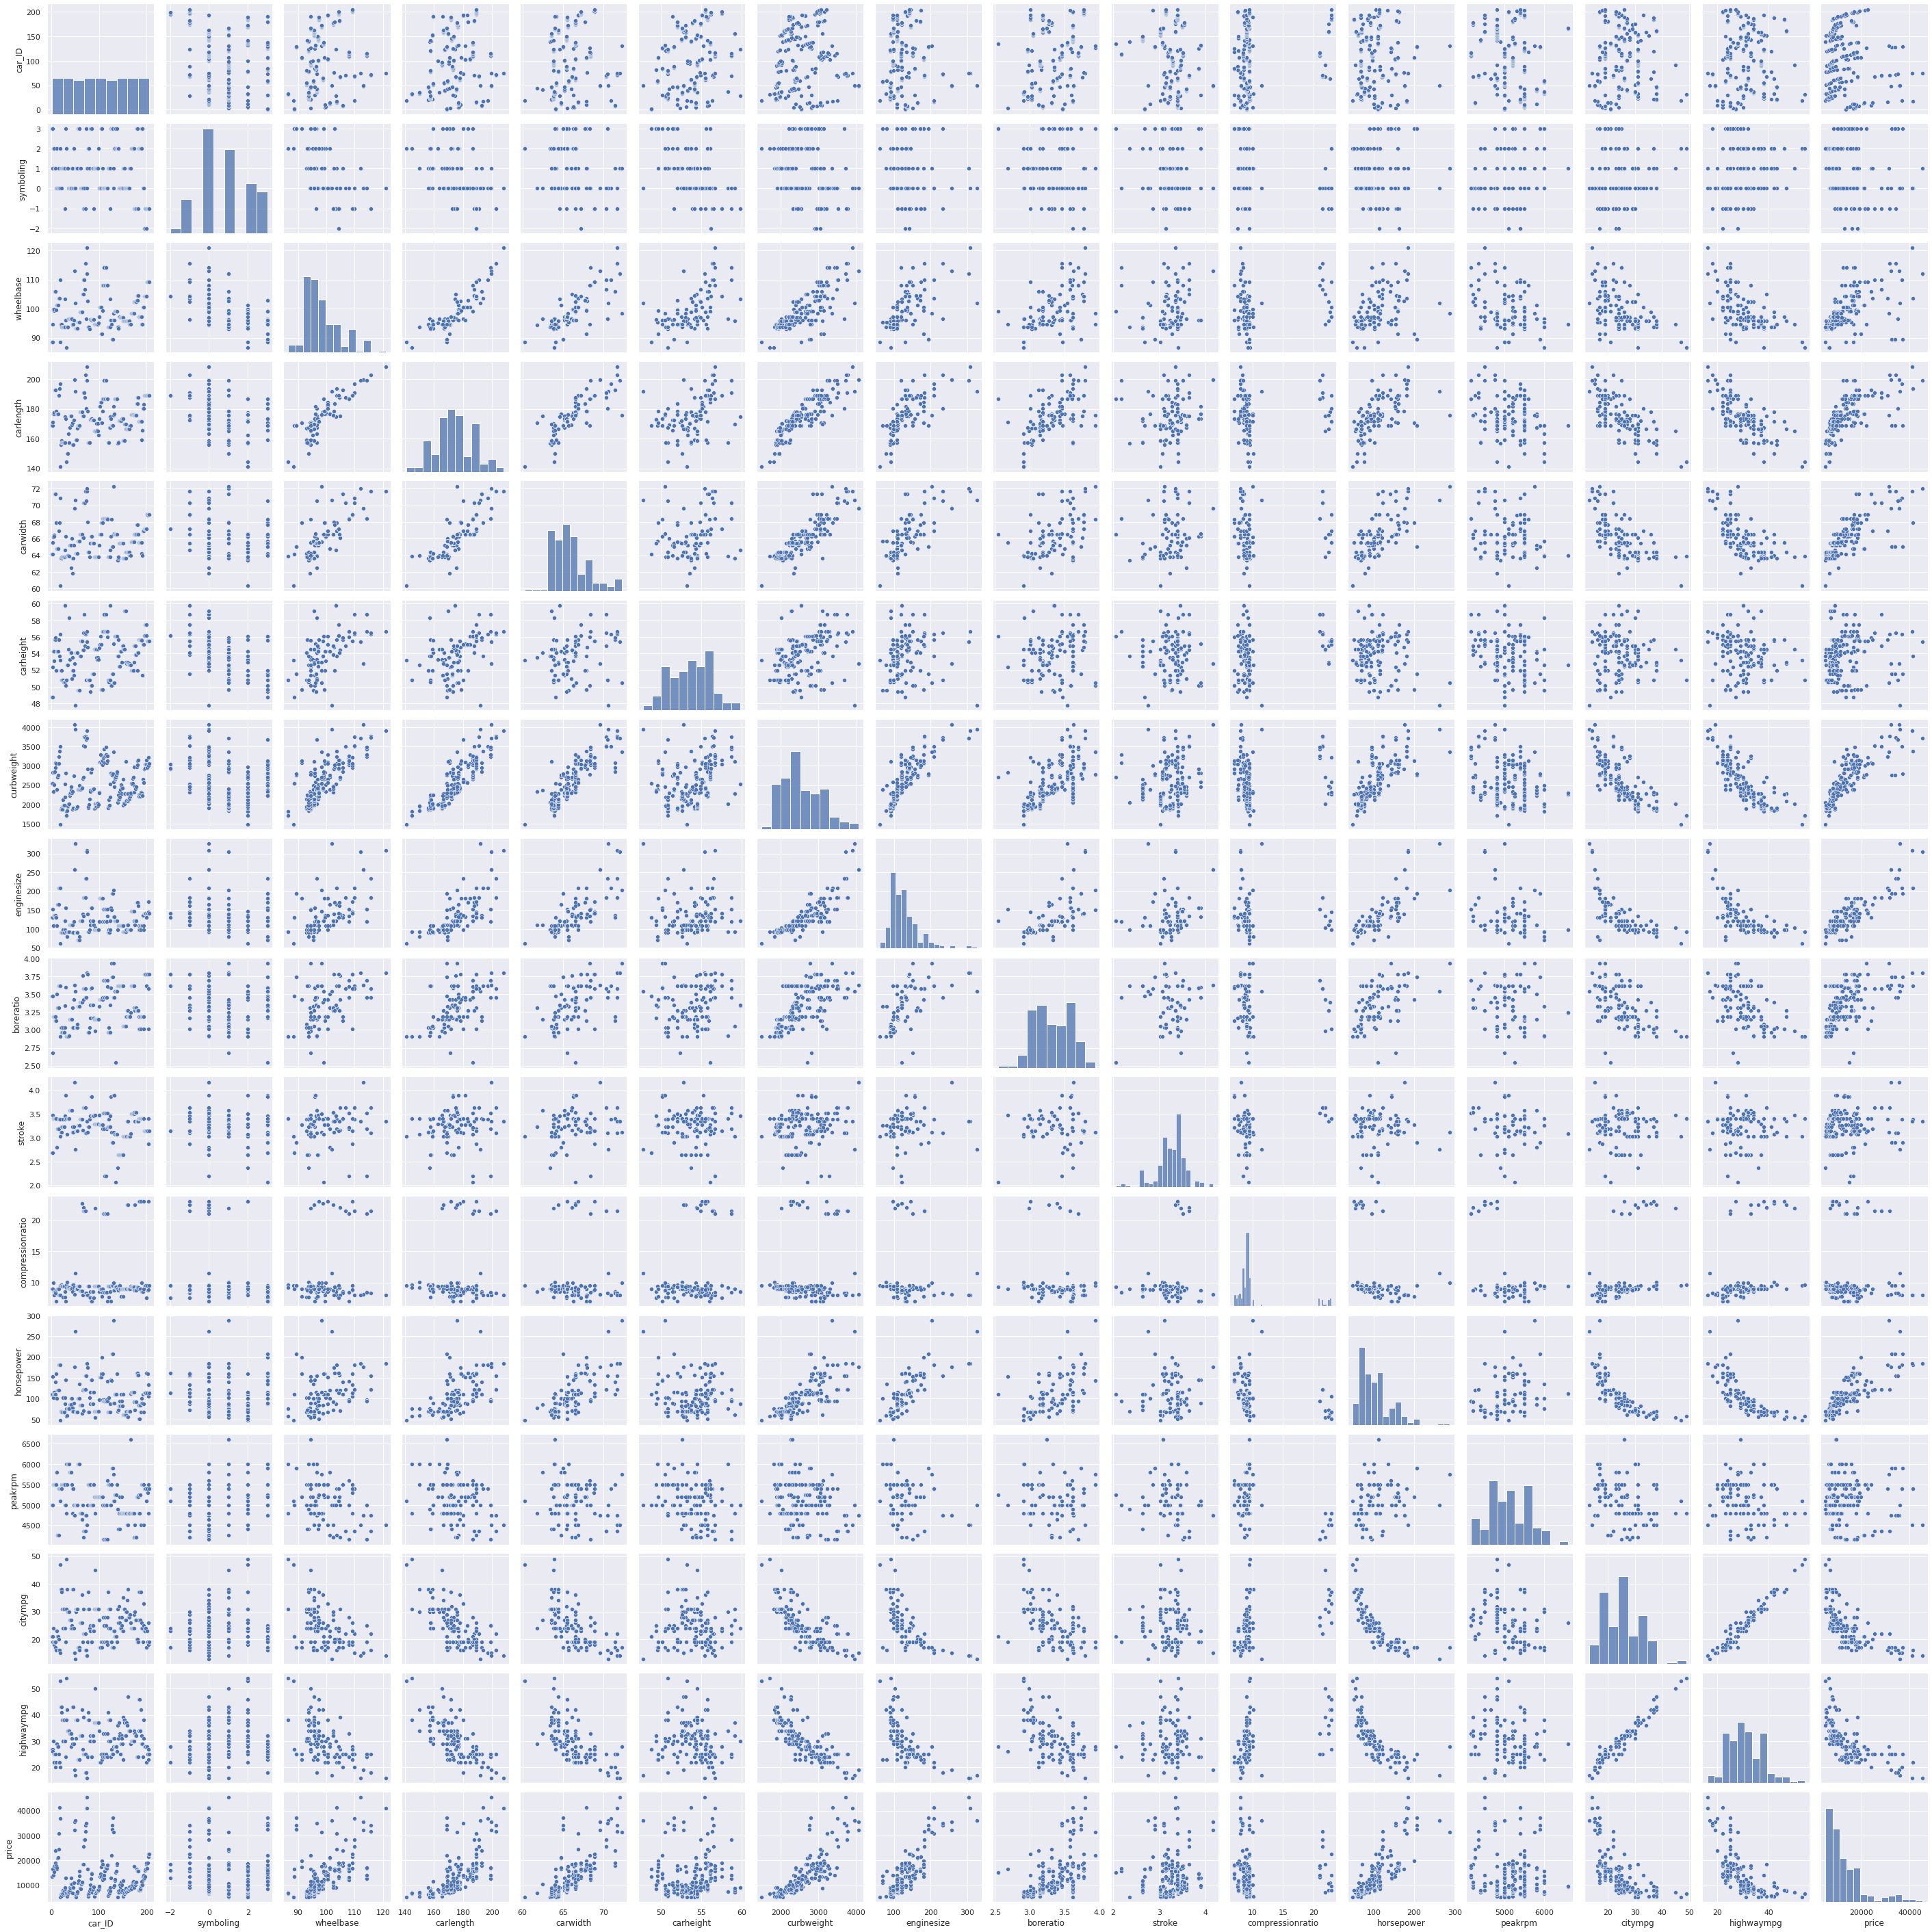

In [ ]:
# 1. Visualize the data using Seaborn Pairplots
 
g = sns.pairplot(raw_data)
g





*   Since we are interested in car price, lets check what factors affect most.

*   Wheelbase, carlength, carwidth, curbweight, engine size, horsepower, citympg, highwaympg



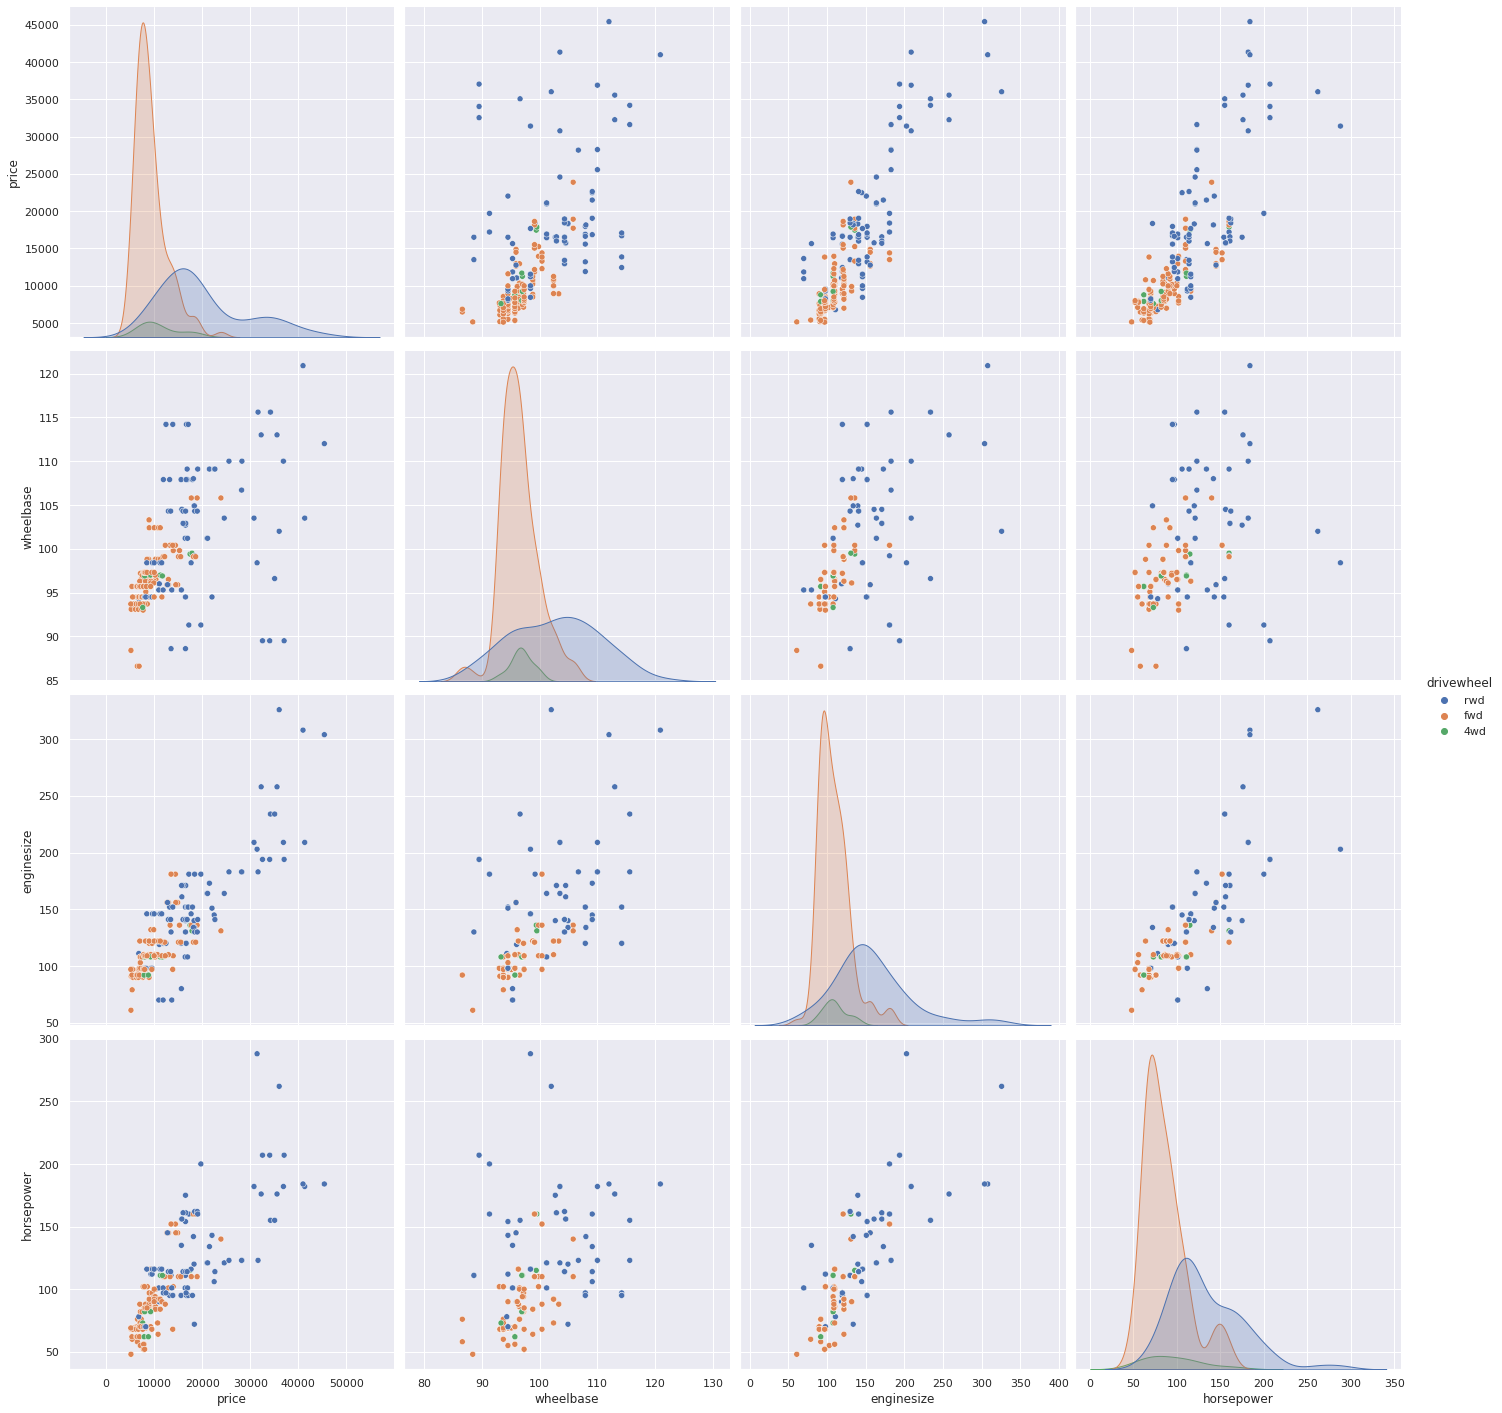

In [ ]:
g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']],hue='drivewheel',height=5)
#Only catogarical data were selected

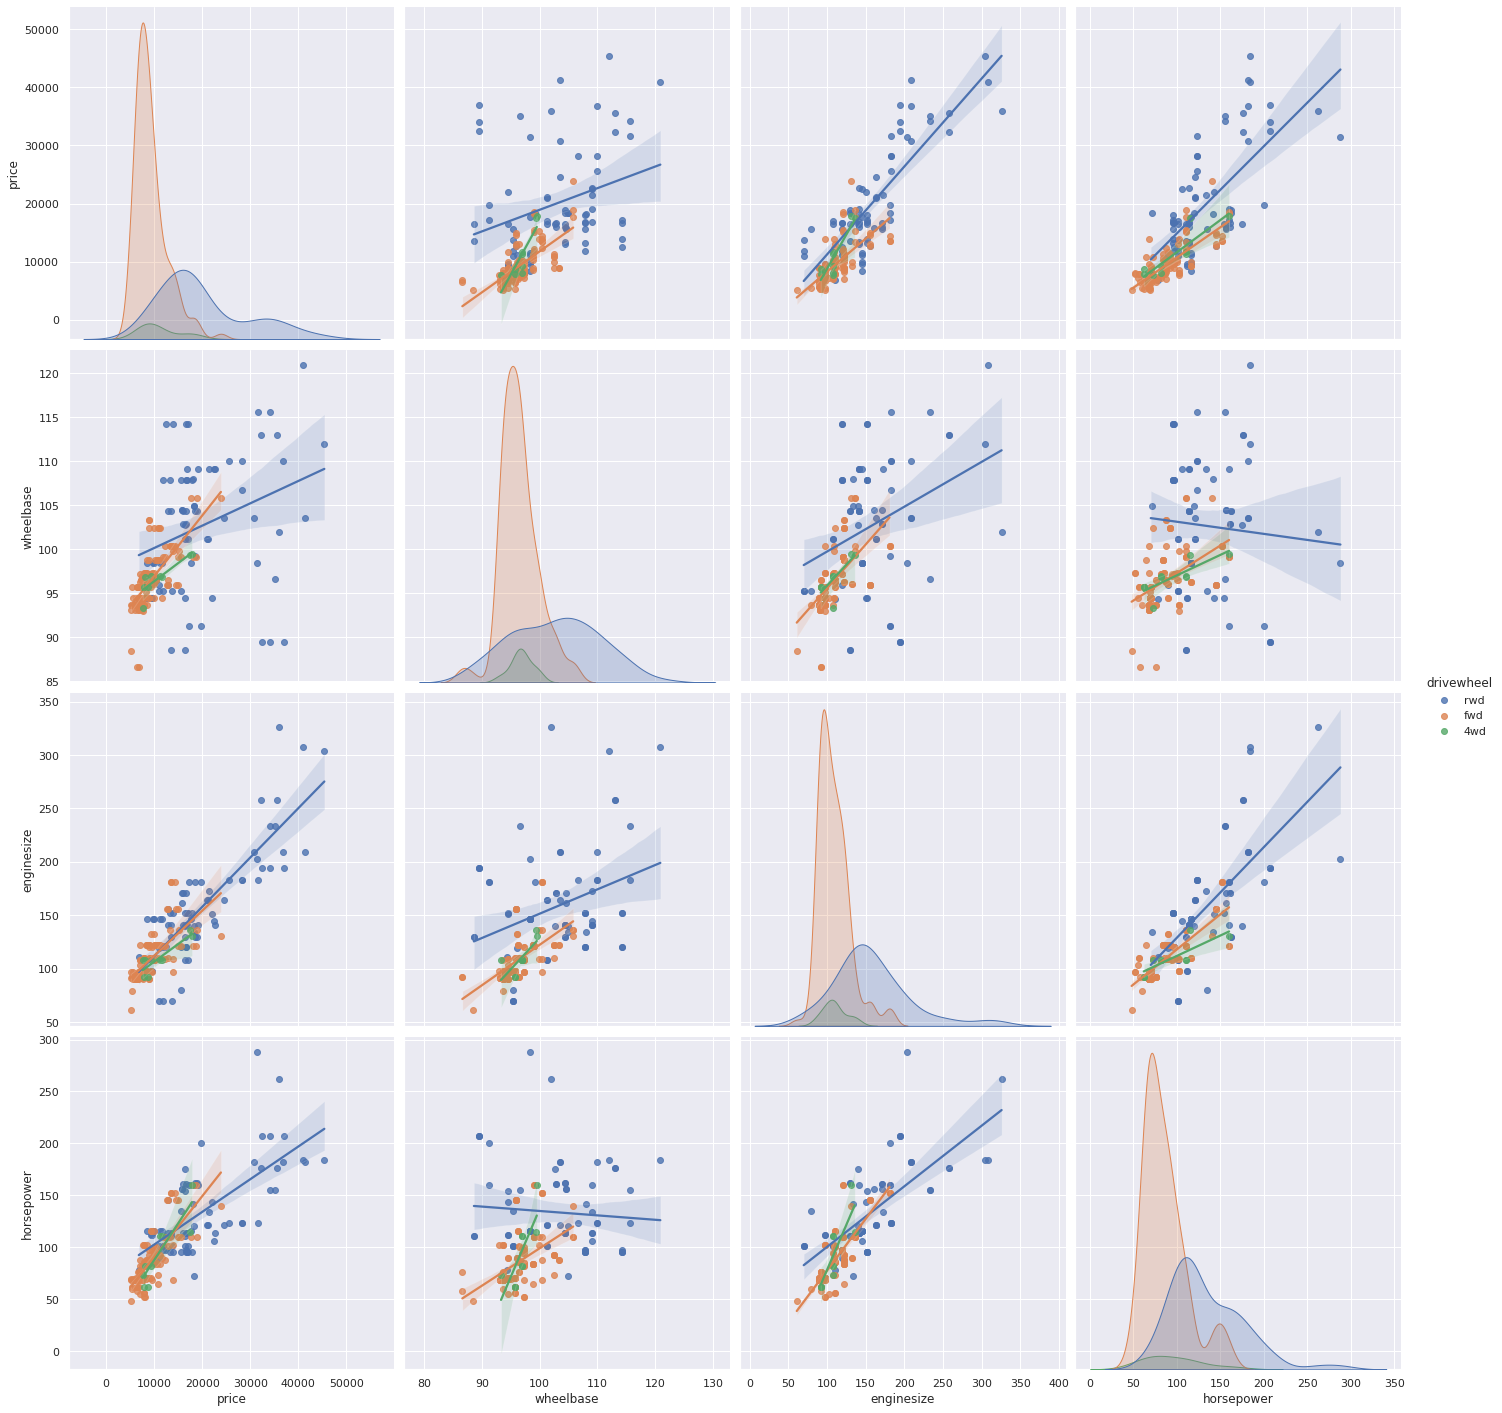

In [ ]:
g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']],hue='drivewheel',height=5,kind='reg')
g

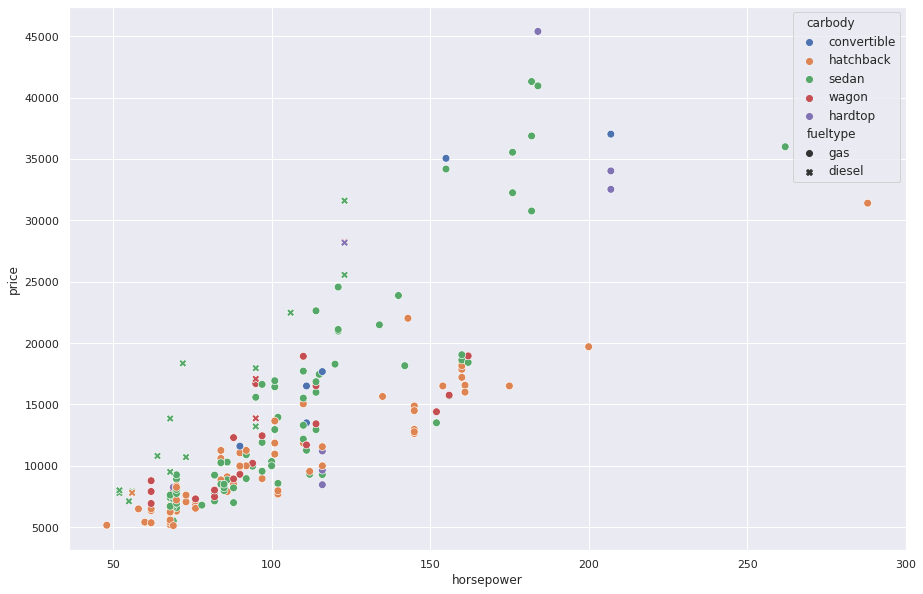

In [ ]:
g = sns.scatterplot(x='horsepower', y='price', data=raw_data, hue = 'carbody', style='fueltype', s=60)

##**Investigating Categorical Data**

carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

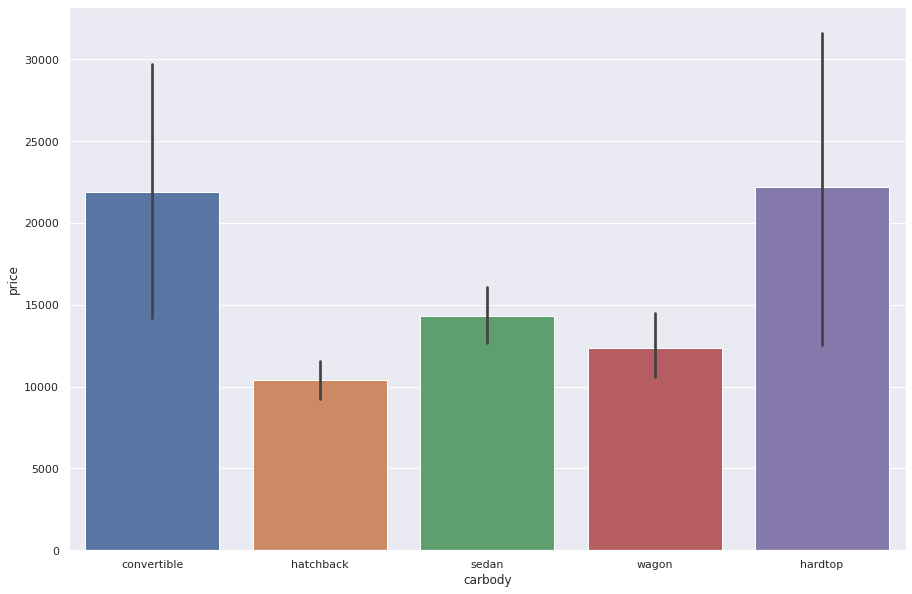

In [ ]:
#Average price by car body

ax = sns.barplot(x='carbody', y='price', data=raw_data)


raw_data[['carbody', 'price']].groupby('carbody',as_index = False).agg({'price': 'mean'})

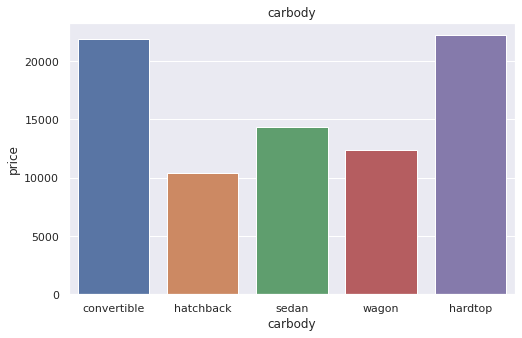

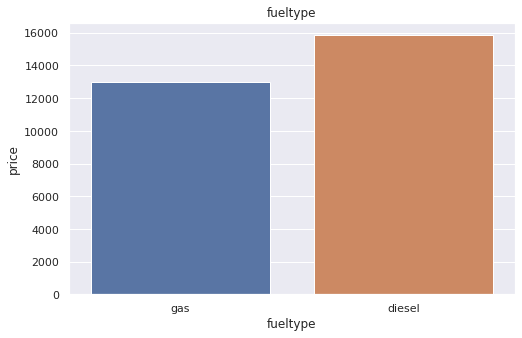

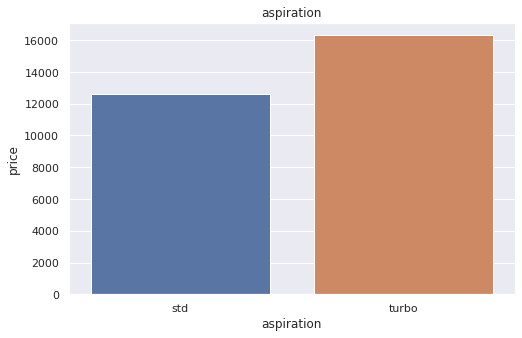

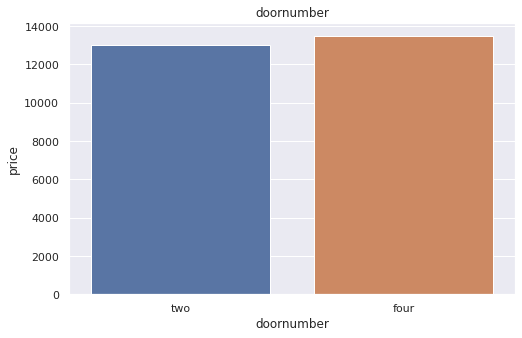

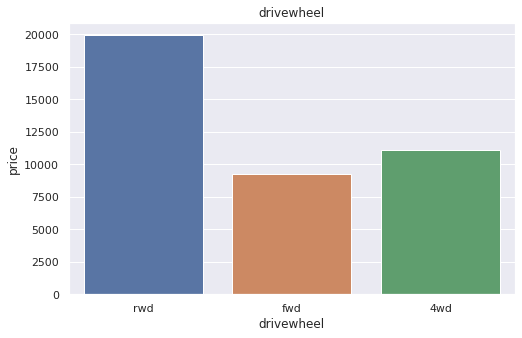

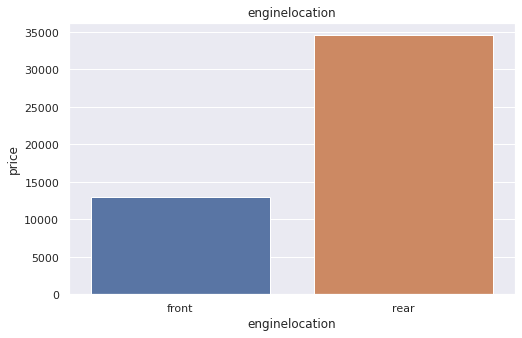

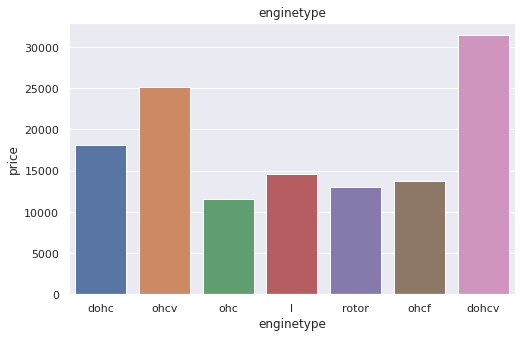

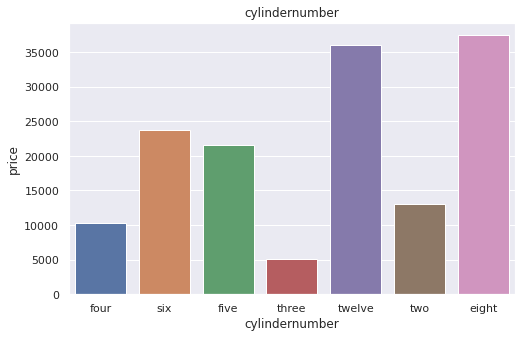

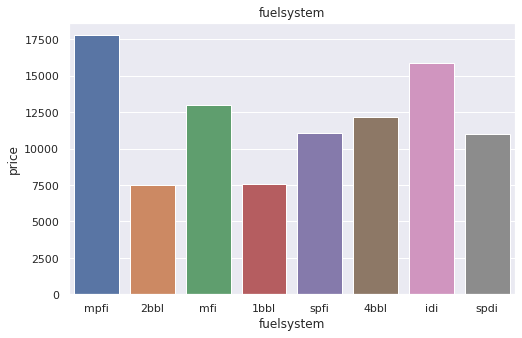

In [ ]:
categories = ['carbody','fueltype','aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

sns.set(rc={'figure.figsize' :(8,5)})

for ct in categories:
  ax = sns.barplot(x=ct, y='price', data=raw_data, ci=False)
  plt.title(ct)
  plt.show()


###**Investigate the Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


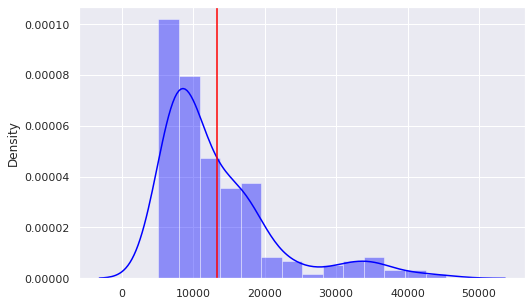

In [ ]:
#investigating the distribution of price adding the mean

x = raw_data['price'].values
sns.distplot(x,color='blue');


#calculate the mean
mean = raw_data['price'].mean()

#plotting the mean
plt.axvline(mean,0,1, color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


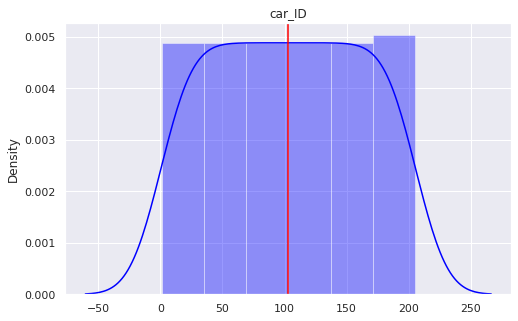

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


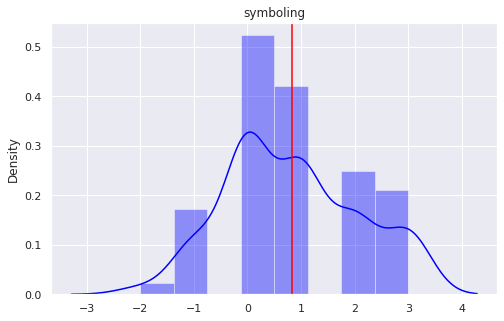

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


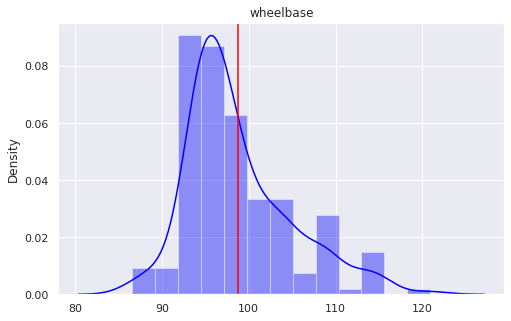

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


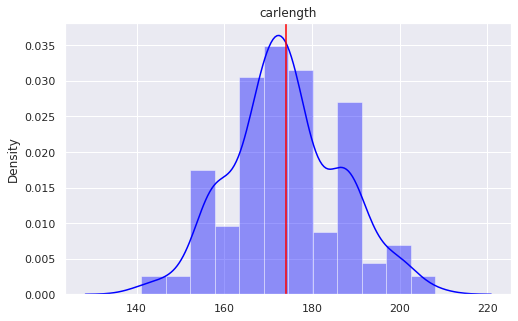

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


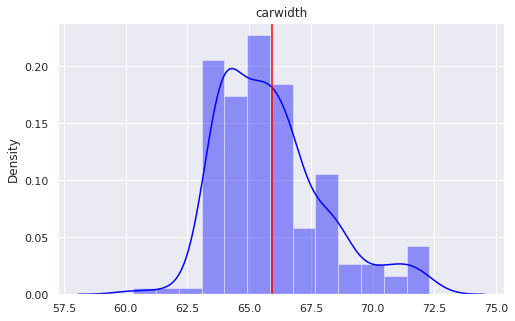

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


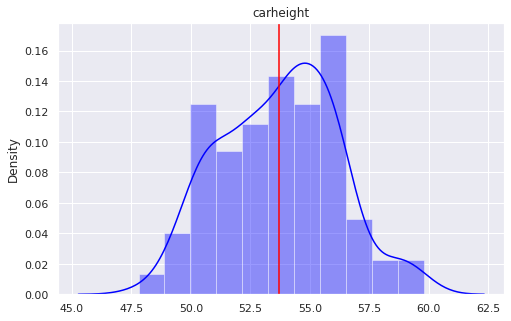

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


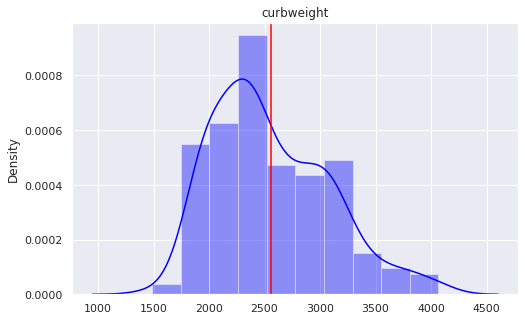

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


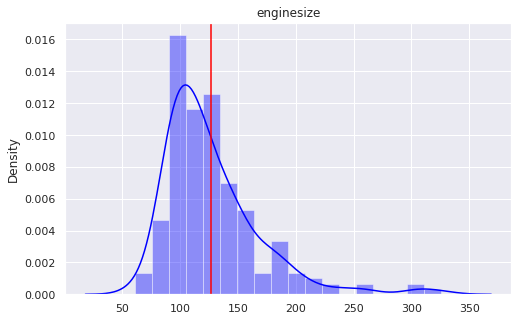

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


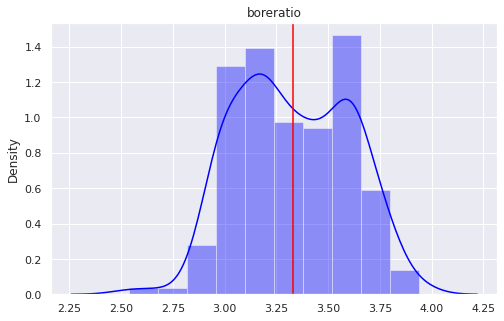

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


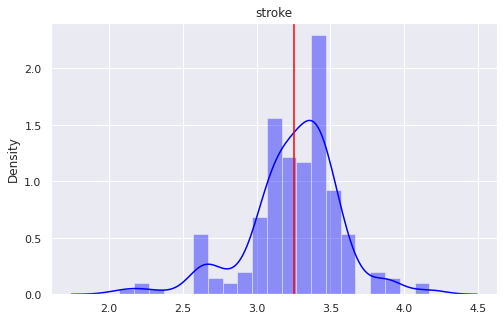

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


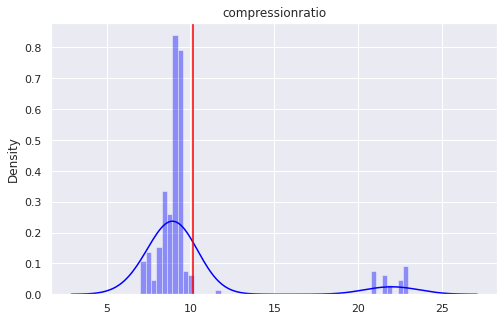

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


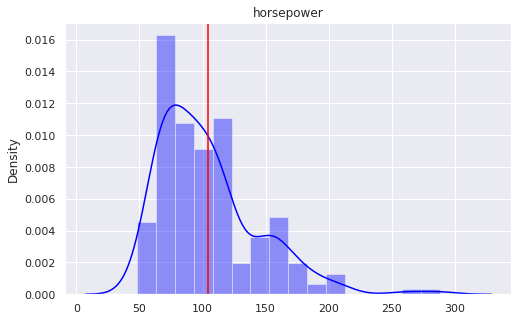

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


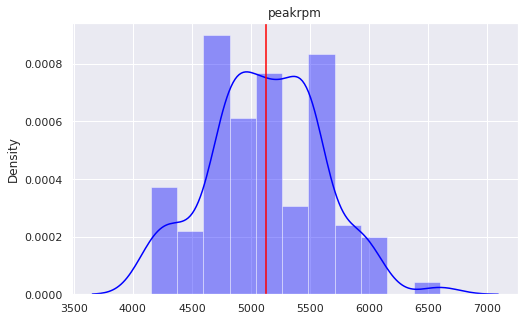

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


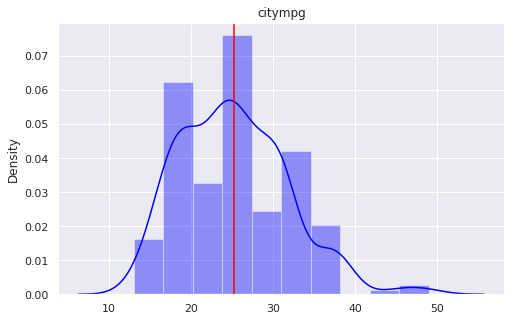

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


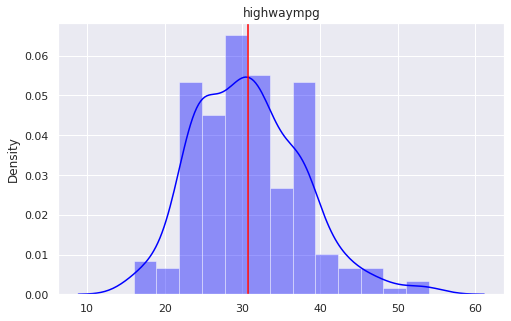

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


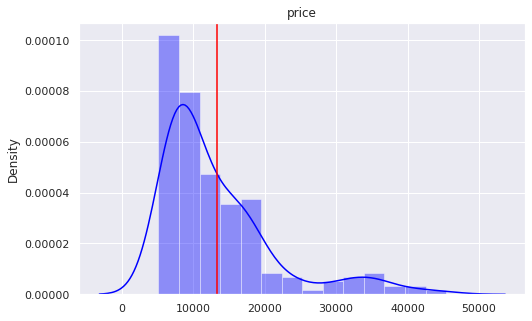

In [ ]:
from pyparsing import null_debug_action
numerics = ['int16', 'int32', 'int64', 'float16', 'float32','float64']

n_variables = raw_data.select_dtypes(include=numerics).columns

sns.set(rc={'figure.figsize':(8,5)})

for n in n_variables :
  x = raw_data[n].values
  sns.distplot(x, color='blue')

  mean = raw_data[n].mean()

  plt.axvline(mean,0,1,color='red')
  plt.title(n)
  plt.show()

**Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Median is  10295.0


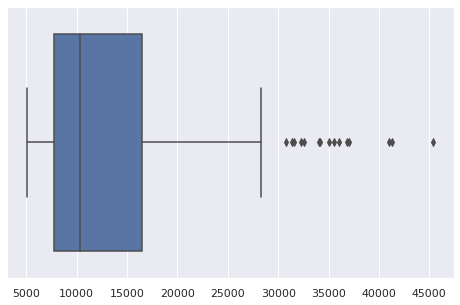

In [ ]:
x = raw_data['price'].values
ax = sns.boxplot(x)

print('Median is ', raw_data['price'].median())

**Converting Categorical values into numerical representation**

In [ ]:
import warnings

new_raw_data = pd.get_dummies(raw_data, columns=['carbody','fueltype','aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])

new_raw_data.head()


car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight  enginesize  boreratio  ...  \
0      64.1       48.8        2548         130       3.47  ...   
1      64.1       48.8        2548         130       3.47  ...   
2      65.5       52.4        2823         152       2.68  ...   
3      66.2       54.3        2337         109       3.19  ...   
4      66.4       54.3        2824         136       3.19  ...   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_1bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0                1                0                0  
1                1                0                0  
2                1                0                0  
3                1                0                0  
4                1                0                0  

[5 rows x 55 columns]

In [ ]:
new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int64
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

# **Selecting Most Important Features**


1.   Heatmap - Corelation coefficient
2.   Feature Importance



In [ ]:
#Heat Map


del new_raw_data['CarName']

Heatmap


1.   First we create a "Dataset" to display on a Heatmap - we will use a corrlatoin dataset
2.   .cor() is used to find the pairwise 

correlation of all columns in the dataframe.
**Any null values are automatically excluded.**

3.   The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase/decrease   











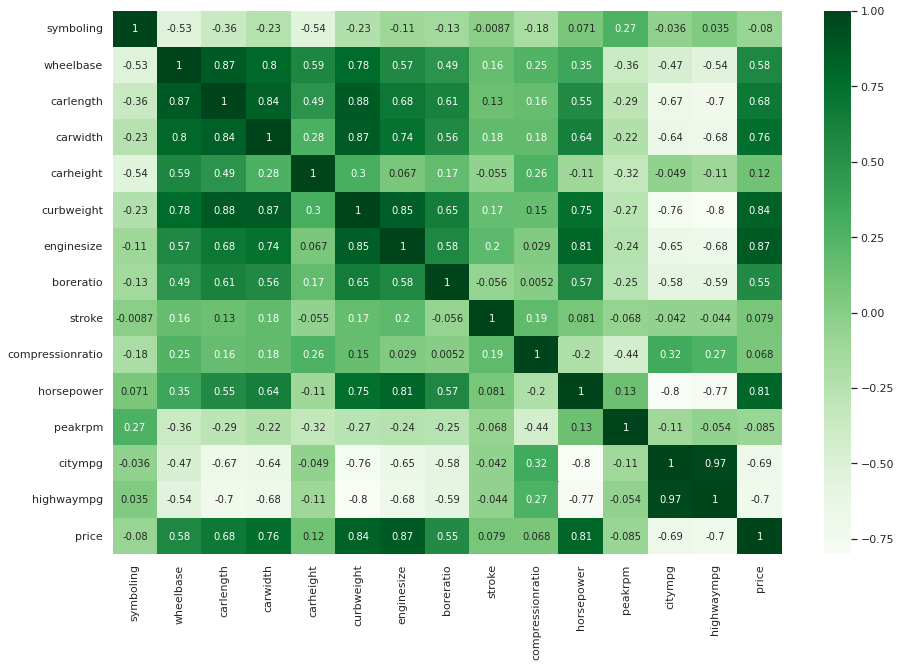

In [ ]:

sns.set(rc={'figure.figsize':(15,10)})

n_var = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
         'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm','citympg',
         'highwaympg','price']

pc = new_raw_data[n_var].corr(method='pearson')

cols = n_var

ax = sns.heatmap(pc, annot=True, yticklabels=cols,xticklabels=cols,annot_kws={'size':10},cmap="Greens")



**Feature Importance**
*Steps of running Feature Importance*



*   Split the data into X & Y
*   Run a tree-based estimations (i.e decisoin tree & random forests)
*   Run Feature Importance
*   We meassure the importance of a feature by calculating the increase in the model's prediction error after permuting the feature




In [ ]:
#split the data into x & y

X = new_raw_data.drop(['price'],axis=1).values
x_col = new_raw_data.drop(['price'],axis=1)

y= new_raw_data['price'].astype(int)




In [ ]:
#Run tree based estimation

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

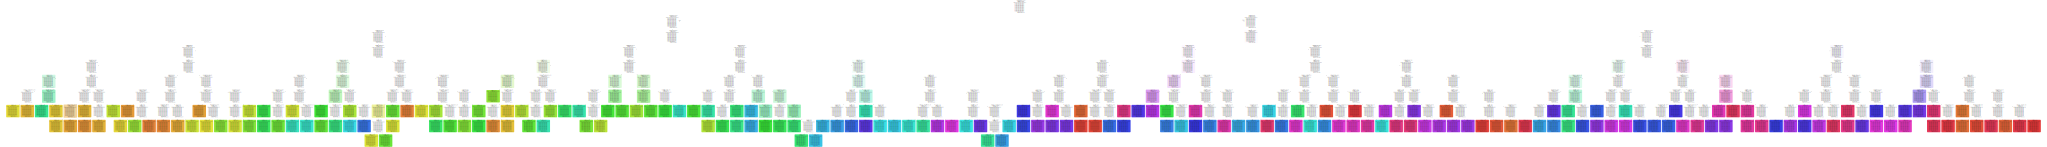

In [ ]:
import graphviz
from sklearn import tree

sns.set(rc={'figure.figsize':(0.2,0.2)})
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=new_raw_data.drop('price',
                                                                                  axis=1).columns,
                                class_names = new_raw_data['price'].unique().astype(str),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

graph

In [ ]:
dt.feature_importances_

array([0.06709744, 0.00836196, 0.10628199, 0.05797326, 0.03906812,
       0.11069647, 0.24115026, 0.00178623, 0.05316757, 0.00496111,
       0.01631418, 0.00885142, 0.09456605, 0.01426826, 0.01443607,
       0.04866888, 0.        , 0.00567654, 0.01141783, 0.00129677,
       0.00965873, 0.00129677, 0.0122833 , 0.01790168, 0.00665545,
       0.        , 0.00968976, 0.00389031, 0.00389031, 0.        ,
       0.        , 0.00493398, 0.        , 0.00839299, 0.        ,
       0.003083  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00968976, 0.        , 0.        , 0.        ,
       0.        , 0.00259354])

In [ ]:
#del final_fi
#Calculating FI

for i, col in enumerate(new_raw_data.drop('price',axis=1)):
  print("Importance of feature {} : {:.3}".format(col, dt.feature_importances_[i]))

  fi = pd.DataFrame({'Variable':[col], 'Feature Importance Score':[dt.feature_importances_[i]]})

  try:
    final_fi = pd.concat([final_fi, fi], ignore_index=True)
  
  except:
    final_fi = fi

#Ordering the data

final_fi = final_fi.sort_values("Feature Importance Score", ascending =False).reset_index()
final_fi

Importance of feature car_ID : 0.0671
Importance of feature symboling : 0.00836
Importance of feature wheelbase : 0.106
Importance of feature carlength : 0.058
Importance of feature carwidth : 0.0391
Importance of feature carheight : 0.111
Importance of feature curbweight : 0.241
Importance of feature cylindernumber : 0.00179
Importance of feature enginesize : 0.0532
Importance of feature boreratio : 0.00496
Importance of feature stroke : 0.0163
Importance of feature compressionratio : 0.00885
Importance of feature horsepower : 0.0946
Importance of feature peakrpm : 0.0143
Importance of feature citympg : 0.0144
Importance of feature highwaympg : 0.0487
Importance of feature carbody_convertible : 0.0
Importance of feature carbody_hardtop : 0.00568
Importance of feature carbody_hatchback : 0.0114
Importance of feature carbody_sedan : 0.0013
Importance of feature carbody_wagon : 0.00966
Importance of feature aspiration_std : 0.0013
Importance of feature aspiration_turbo : 0.0123
Importanc

level_0  index             Variable  Feature Importance Score
0         0    6.0           curbweight                  0.241150
1        53    NaN           curbweight                  0.241150
2         1    5.0            carheight                  0.110696
3        52    NaN            carheight                  0.110696
4         2    2.0            wheelbase                  0.106282
..      ...    ...                  ...                       ...
89       43   32.0      fuelsystem_4bbl                  0.000000
90       34   44.0     enginetype_rotor                  0.000000
91       33   45.0      fueltype_diesel                  0.000000
92       32   39.0     enginetype_dohcv                  0.000000
93       42   16.0  carbody_convertible                  0.000000

[94 rows x 4 columns]

Splitting the Raw Data

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size = 0.80, test_size=0.20, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 47)
(41, 47)
(164,)
(41,)


****Linear Regression Analysis****

In [ ]:
lm = LinearRegression(fit_intercept =True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)



In [ ]:
#Model Accuracy

print("The accuracy on the training dataset is : ", lm.score(X_train,y_train))
print("The accuracy on the training dataset prediction  is : ", r2_score(y_train,y_pred))

print("")

#Accuracy on the testing dataset
print("The accuracy on the training dataset is : ", lm.score(X_test,y_test))

#Root mean Squared Error (RMSE)



The accuracy on the training dataset is :  0.939012854622914
The accuracy on the training dataset prediction  is :  0.939012854622914

The accuracy on the training dataset is :  0.850861805090601


Improving the Accuracy
